首先读取数据

In [1]:
import pickle
import sys
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import random
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
plt.rcParams['font.family'] = ['Simhei']  # 中文显示

设置相应的超参数

In [2]:
d1,d2=2500,2500
w1,w2=40,40


window_size = 100  # 窗口大小,导致线平缓度
poly_order = 4    # 多项式阶数

In [3]:

#由你的电脑的屏幕大小来决定
screen_width,screen_height=2560,1600

#print(screen_wide,screen_high  )

def read_data(d1,d2,w1,w2):
    '''
    通过D,和W的大小来区分和读取数据，并返回四个数据结果。
    '''
    name=sys.path[0]+'\data\\'+'D='+str(d1)+'-'+str(d2)+'_W='+str(w1)+'-'+str(w2)+".bin"

    with open(name,'rb') as file:
        move_datas=pickle.load(file)
    
    return move_datas

mouse_move=read_data(d1,d2,w1,w2)

In [4]:
T=[]
X=[]
Y=[]
for k in range(len(mouse_move)):
    t=[]
    x=[]
    y=[]
    for i in range(len(mouse_move[k])):
        #print(mouse_move[0][i])
        t.append(mouse_move[k][i][0]-mouse_move[k][0][0])
        x.append(mouse_move[k][i][1])
        y.append(mouse_move[k][i][2])   
    T.append(t)
    X.append(x)
    Y.append(y)

In [5]:

S=[]

for i in range(len(T)):
    l=0
    s=[0,]#点在轨迹上的位置
    for j in range(1,len(T[i])):
        l+=np.sqrt((X[i][j]-X[i][j-1])**2+(Y[i][j]-Y[i][j-1])**2)
        s.append(l)
    S.append(s)



In [6]:
T_all=[]
S_all=[]

for i in range(len(T)):
    T_all.append(T[i][-1])
    S_all.append(S[i][-1])
print(T_all)
print(S_all)

t0=[]
t1=[]
T_less=[]

for i in range(len(T)):
    for j in range(len(T[i])):
        if S[i][j]!=S[i][j+1]:
            t0.append(T[i][j])
            break
    for j in range(len(T[i])):
        if S[i][-j]!=S[i][1-j]:
            t1.append(T[i][-j])
            break
    T_less.append(t1[i]-t0[i])

print(t0)
print(t1)
print(T_less)


[0.4711136817932129, 0.5541598796844482, 0.525768518447876, 0.5004827976226807, 0.5611321926116943, 0.5933313369750977, 0.5035009384155273, 0.5072469711303711, 0.5281689167022705, 0.4755544662475586, 0.5758352279663086, 0.0784311294555664, 0.5993549823760986, 0.5308442115783691, 1.1839029788970947, 0.6795508861541748, 0.6218044757843018, 0.6188545227050781, 0.9318034648895264, 0.9051504135131836, 1.089928388595581, 0.6164524555206299, 0.6569669246673584, 0.8253564834594727, 0.5339300632476807, 0.6029160022735596, 0.7611067295074463, 0.7284853458404541, 0.6864769458770752, 0.6913111209869385, 0.6781957149505615, 1.0969951152801514, 0.5315234661102295, 0.540492057800293, 0.5567045211791992, 0.5930562019348145, 0.9952495098114014, 1.0696539878845215, 0.7861068248748779, 3.3474650382995605]
[1495.5865635662672, 1593.9508594670256, 1657.8614755284866, 1761.714517668699, 1564.805711557501, 1567.3888321462114, 1828.6717242988182, 1470.9950216387745, 1610.02926827522, 1389.4635225988725, 1585.

IndexError: list index out of range

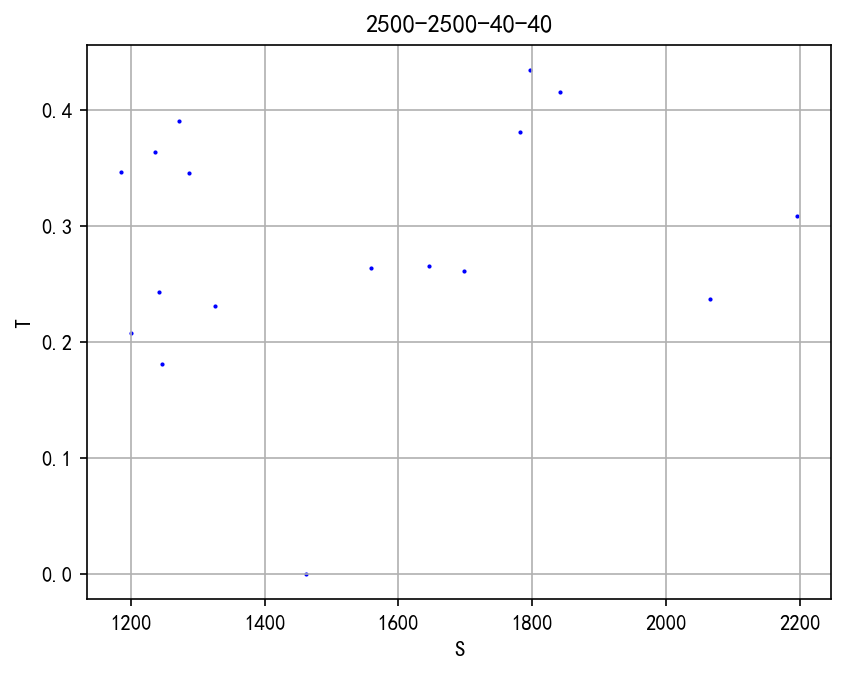

In [ ]:
plt.figure(dpi=150)
plt.scatter(S_all,T_less, c='b', label='L', s=1)
#plt.scatter(T_all[i],S_all[i], c='r', label='S', s=1)
plt.title(str(d1)+'-'+str(d2)+'-'+str(w1)+'-'+str(w2))
plt.xlabel('S')
plt.ylabel('T')
#plt.legend()
plt.grid()
plt.show()

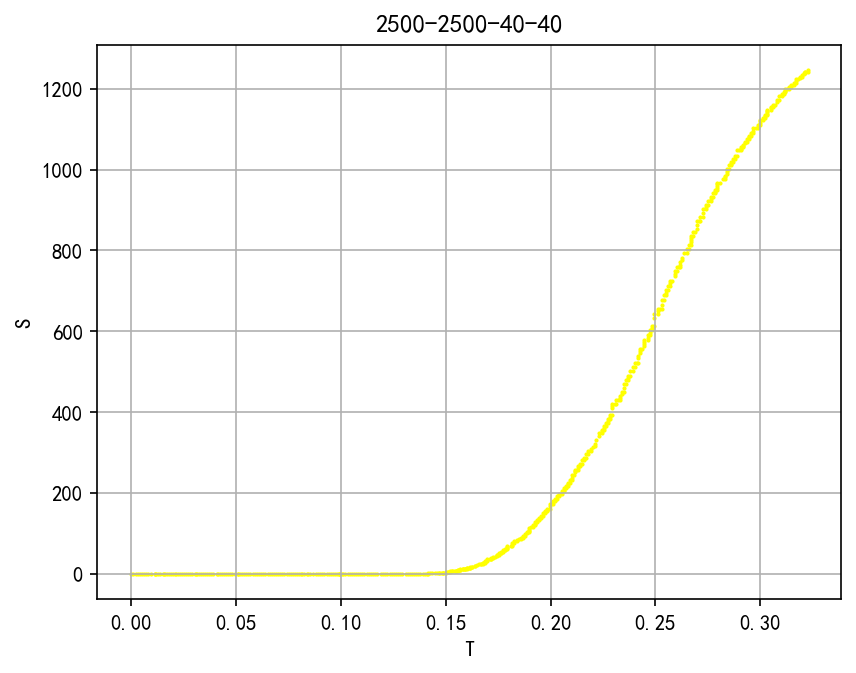

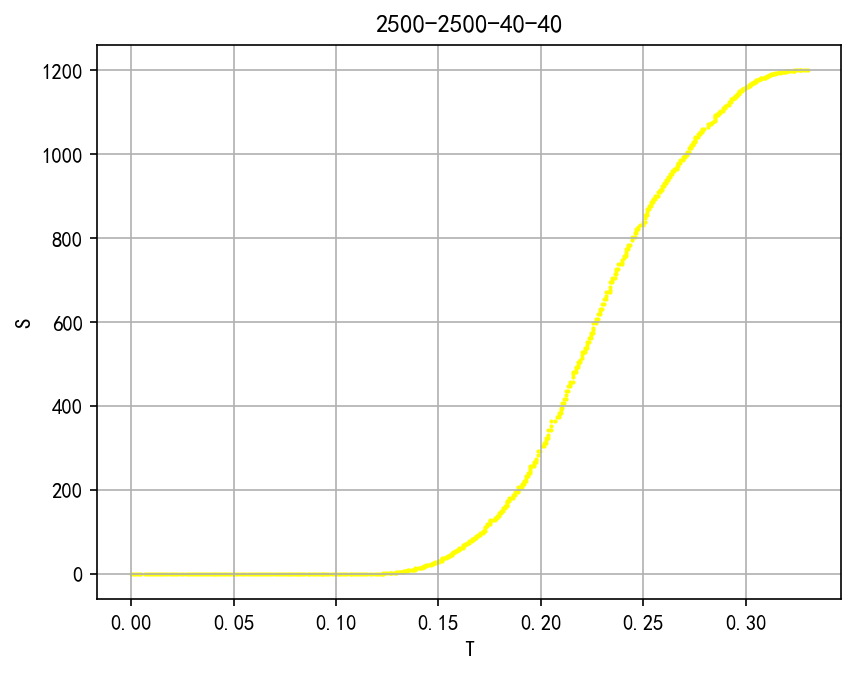

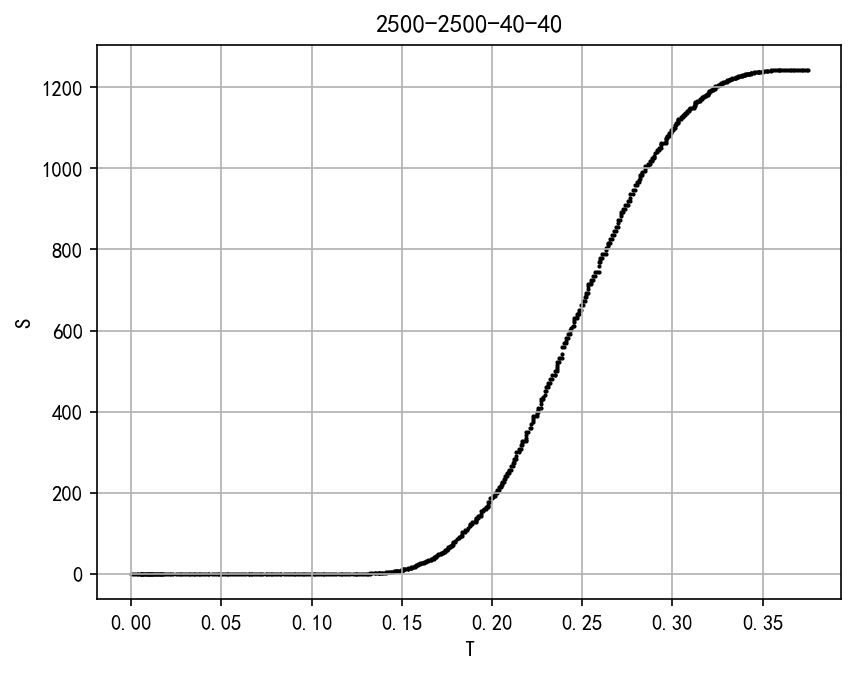

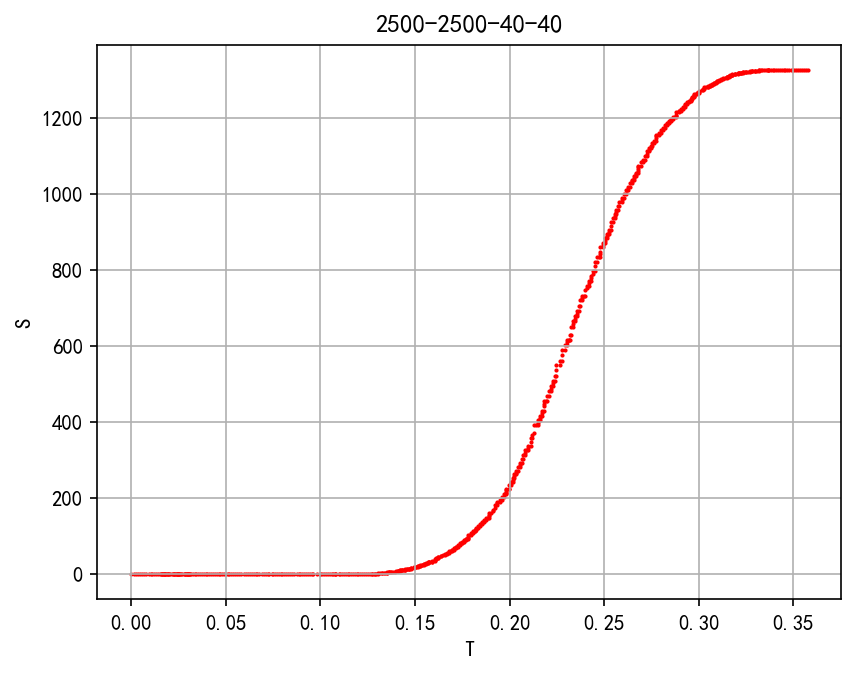

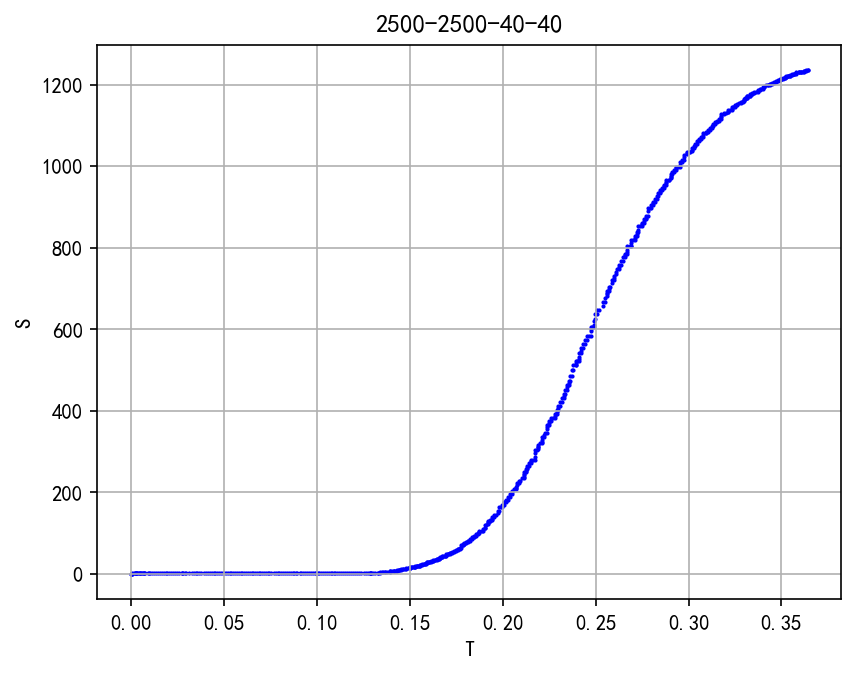

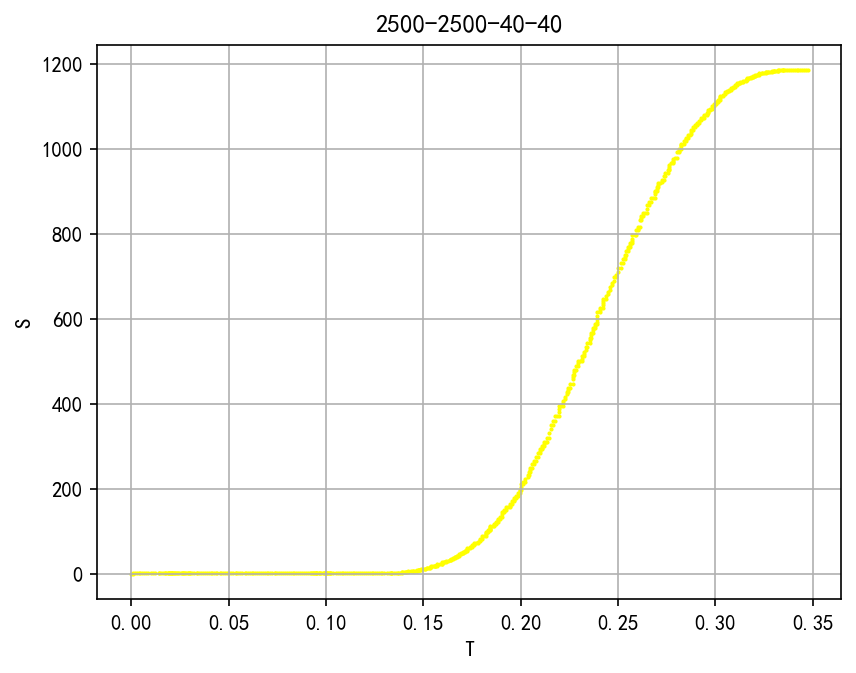

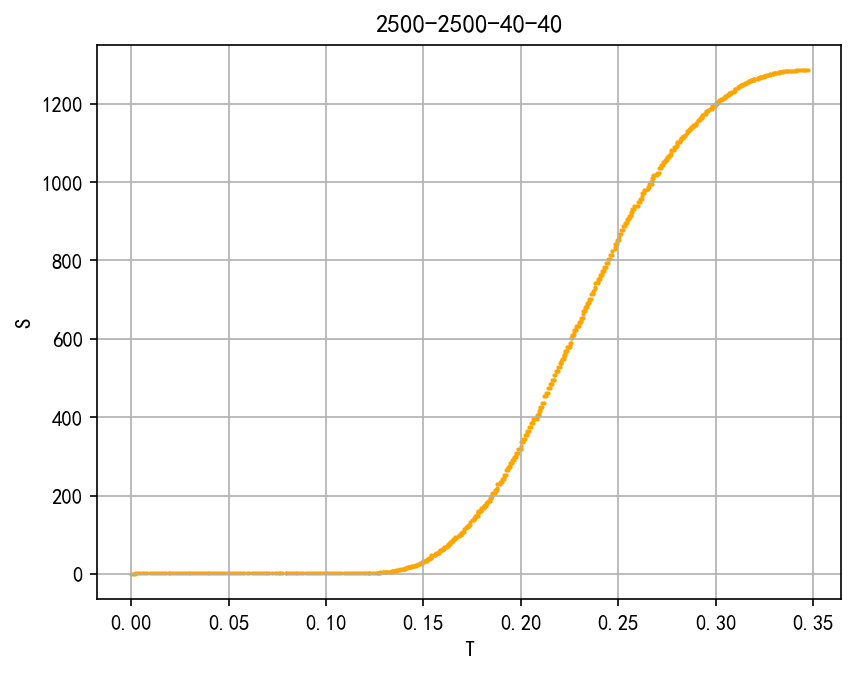

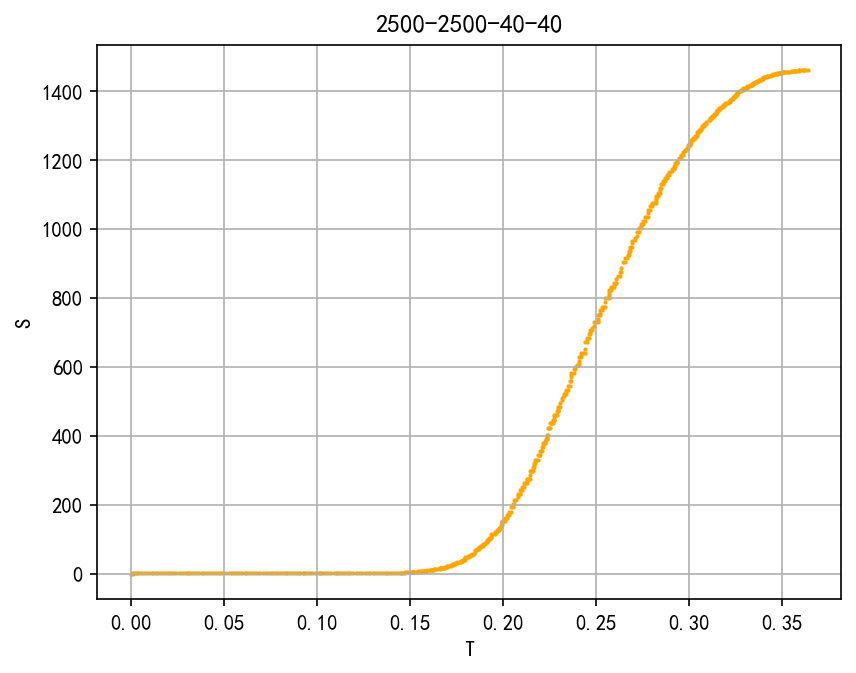

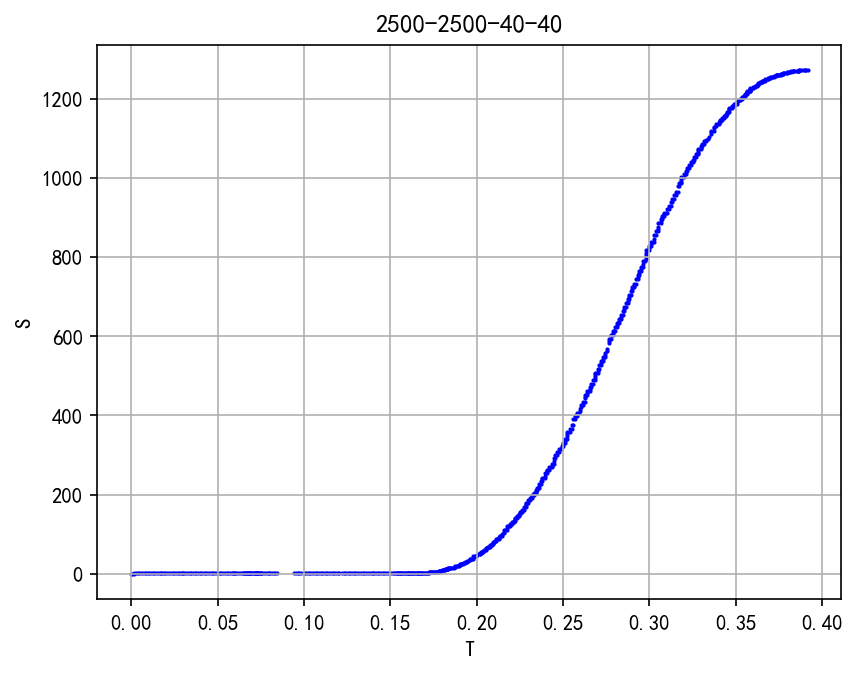

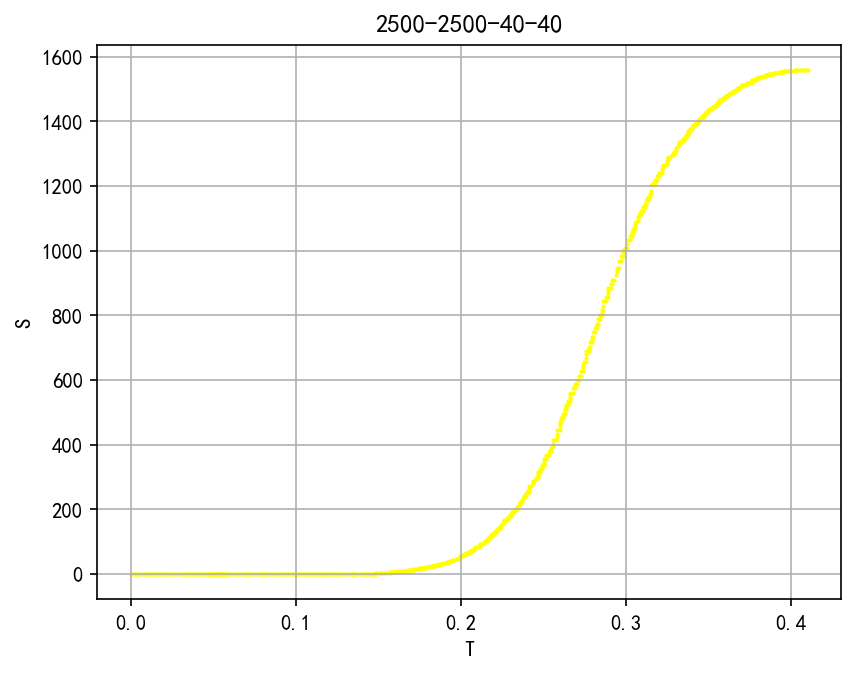

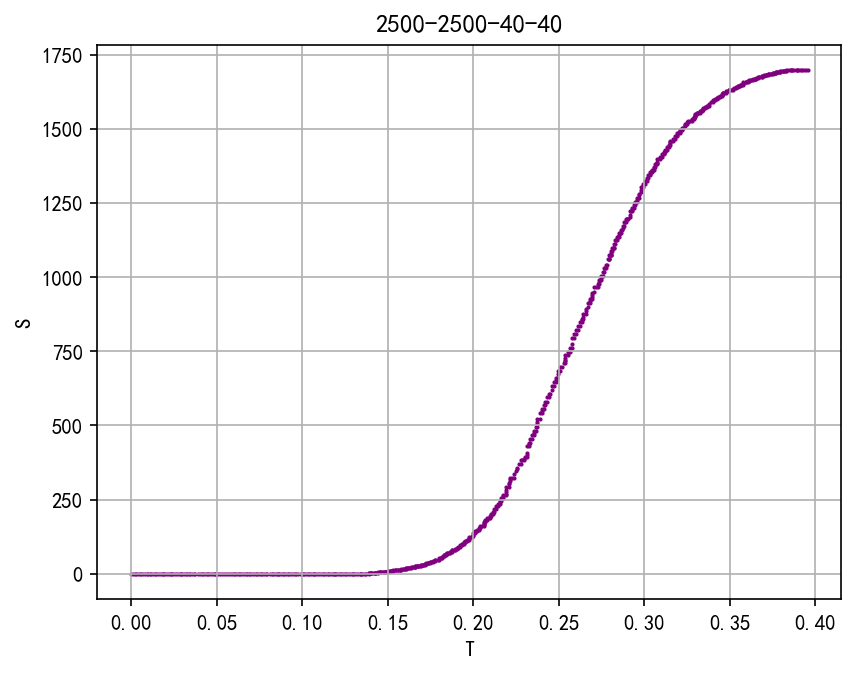

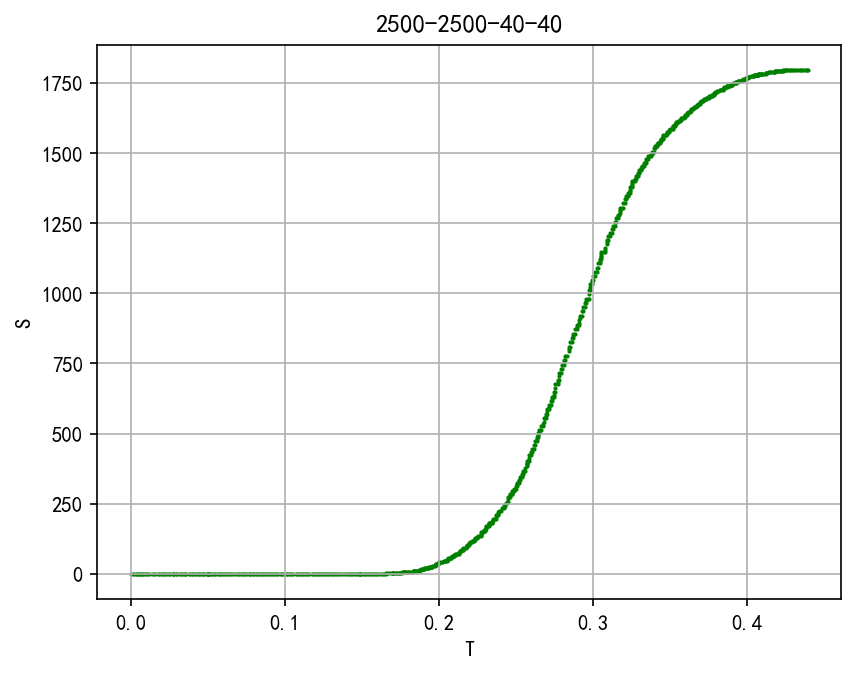

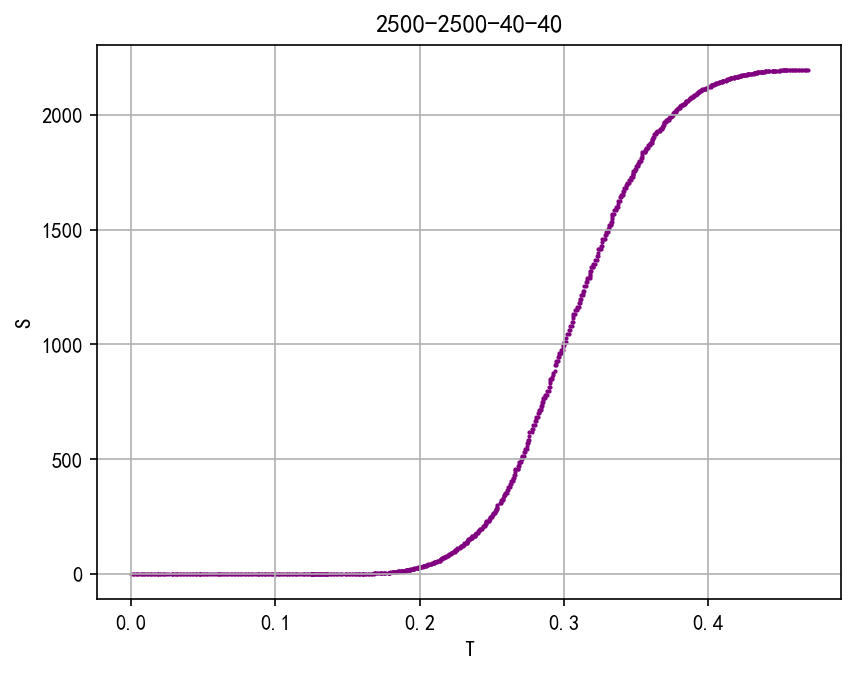

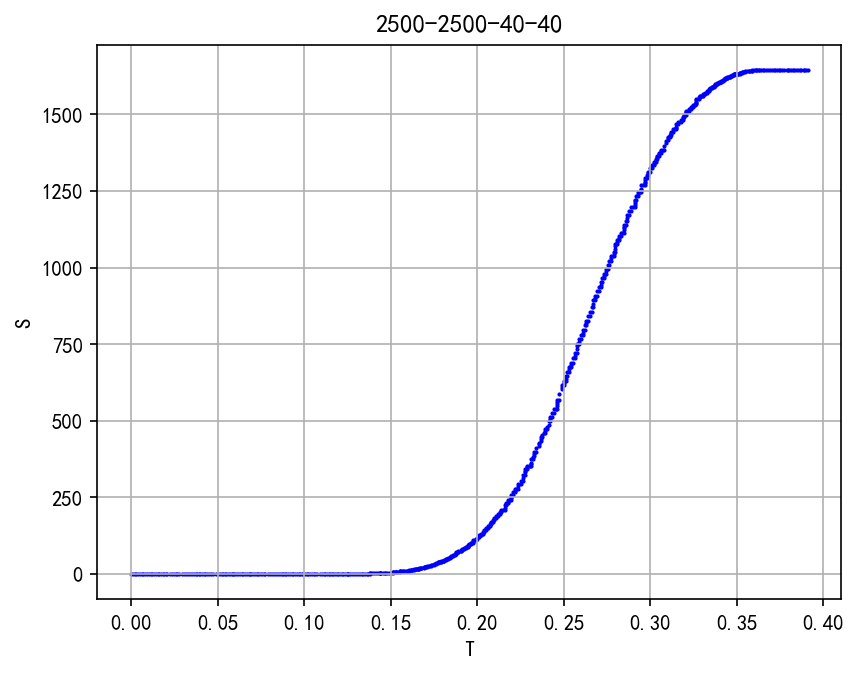

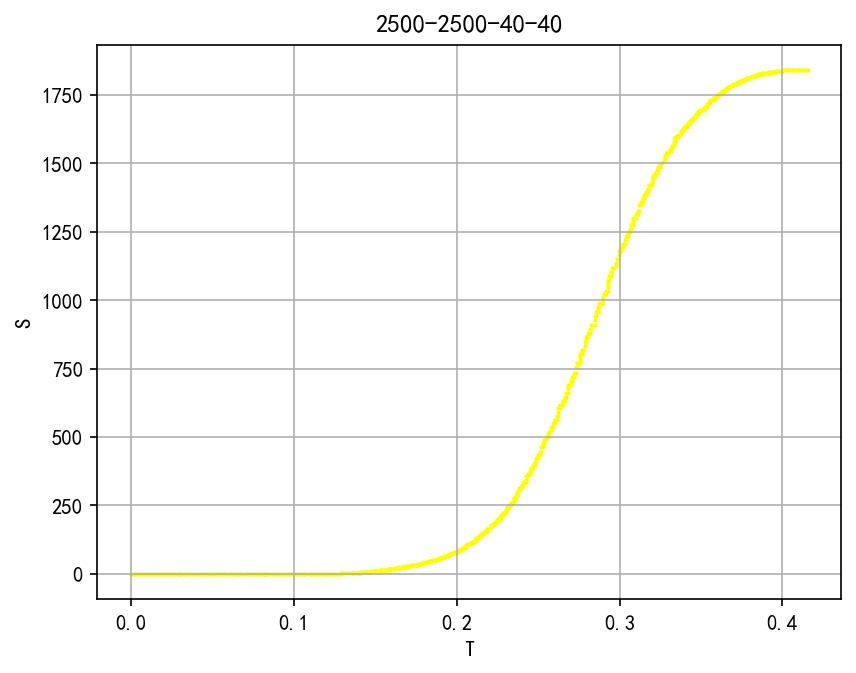

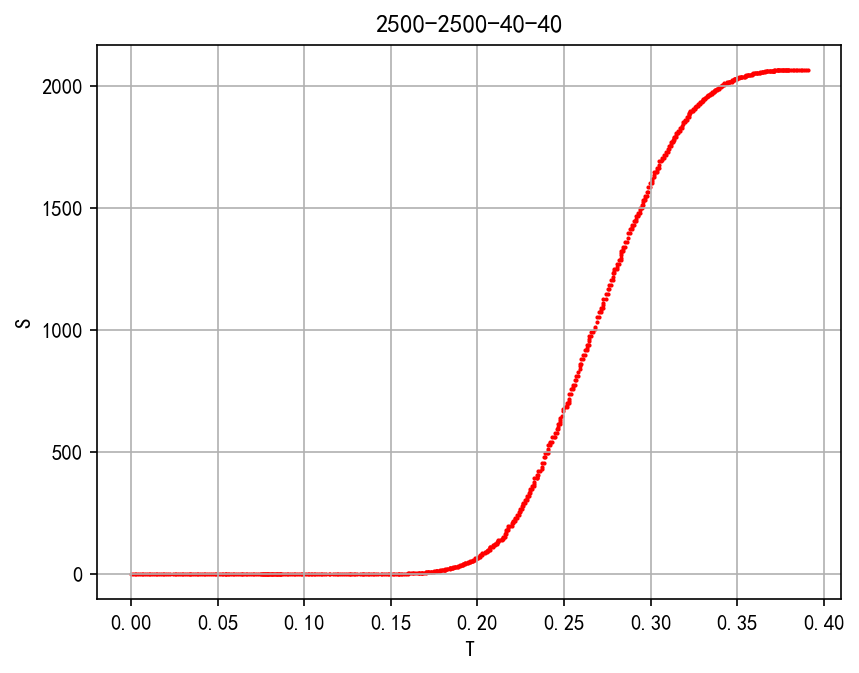

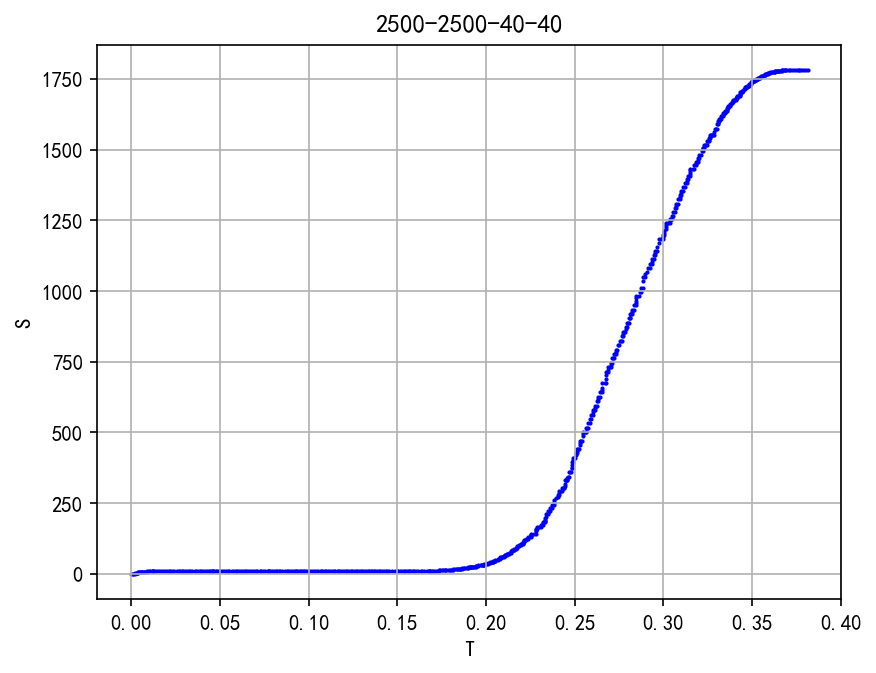

In [ ]:
colors=[
    'red','orange','yellow','green','blue','purple','black',
]
#plt.figure(dpi=300)
for i in range(len(T)):
    plt.figure(dpi=150)
    plt.scatter(T[i],S[i], c=colors[random.randint(0,6)], label='L', s=1)
    #plt.scatter(T_all[i],S_all[i], c='r', label='S', s=1)
    plt.title(str(d1)+'-'+str(d2)+'-'+str(w1)+'-'+str(w2))
    plt.xlabel('T')
    plt.ylabel('S')
    #plt.legend()
    plt.grid()
    plt.show()